In [3]:
#pip install pandas matplotlib seaborn

In [4]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from collections import Counter

In [5]:
RAW = "../data_raw/fr_amazon_catalog.csv"
df = pd.read_csv(RAW, encoding='utf-16', sep='\t')
df["leaf"] = df["Product Category"].str.split(" > ").str[-1]

In [17]:
print("Rows:", len(df))
print("Unique leaf classes:", df["leaf"].nunique())

Rows: 30000
Unique leaf classes: 2257


In [11]:
print(df.head(3))

                            Uniq Id            Crawl Timestamp  \
0  25a6273cd16d79b97c6933b22e34c159  2020-10-31 17:52:32 +0000   
1  f6ef2304b69c69664db28b3892da35f4  2020-10-29 16:43:39 +0000   
2  41410e64c2c44e3b1877934dee617d93  2020-11-12T16:27:22+00:00   

   Dataset Origin                        Product Id Product Barcode  \
0             NaN  587c2918ca748d39d768a1172e46b493             NaN   
1             NaN  c56ddb3d78c2c0958652ff22451dcd9e             NaN   
2             NaN  ee605ffd486fce393e48870f11e94028             NaN   

  Product Company Type Source  Product Brand Source  \
0                  Competitor                   NaN   
1                  Competitor                   NaN   
2                  Competitor                   NaN   

   Product Brand Normalised Source  Product Name Source  Match Rank  ...  \
0                              NaN                  NaN         NaN  ...   
1                              NaN                  NaN         NaN  ...   
2

Statistiques générales:
Nombre total de catégories: 2257
Nombre moyen de produits par catégorie: 12.71
Médiane du nombre de produits par catégorie: 2.00
Écart-type du nombre de produits par catégorie: 46.81

Distribution des produits par catégorie:
Nombre de catégories avec exactement 0 produit: 0
Nombre de catégories avec exactement 1 produit: 927
Nombre de catégories avec exactement 2 produits: 340
Nombre de catégories avec exactement 3 produits: 210
Nombre de catégories avec exactement 4 produits: 116
Nombre de catégories avec 5+ produits: 664

Top 10 des catégories avec le plus de produits:
leaf
Coques, housses et étuis        905
Masques pliants                 616
Accessoires à chignons          551
Coques et housses standards     539
Masques coques                  527
Ciseaux                         520
Autres boissons et smoothies    475
Bavoirs                         458
Brosses                         372
Tondeuses électriques           341
Name: count, dtype: int64


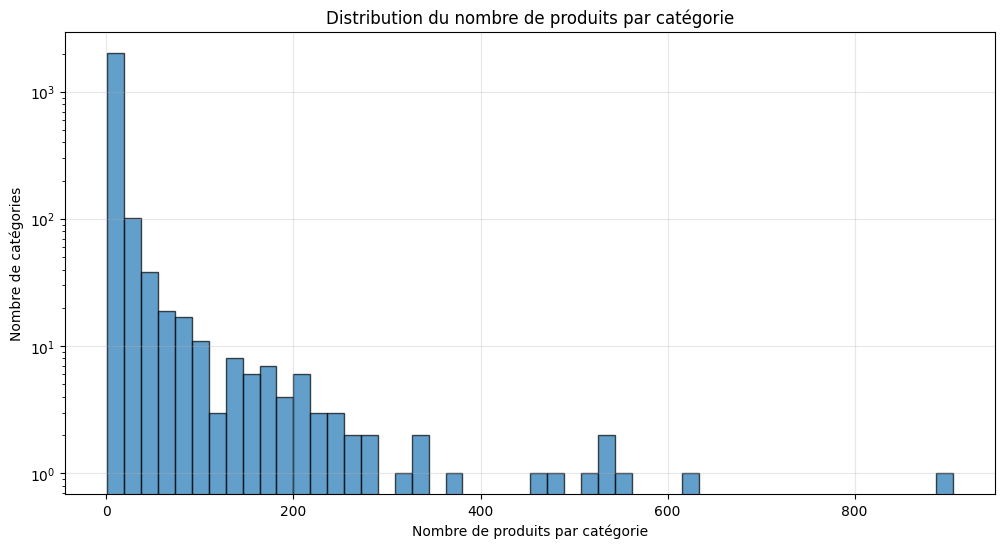

In [20]:
# Analyse de la distribution des produits par catégorie
leaf_counts = df["leaf"].value_counts()


print("Statistiques générales:")
print(f"Nombre total de catégories: {len(leaf_counts)}")
print(f"Nombre moyen de produits par catégorie: {leaf_counts.mean():.2f}")
print(f"Médiane du nombre de produits par catégorie: {leaf_counts.median():.2f}")
print(f"Écart-type du nombre de produits par catégorie: {leaf_counts.std():.2f}")


print("\nDistribution des produits par catégorie:")
print(f"Nombre de catégories avec exactement 0 produit: {(leaf_counts == 0).sum()}")
print(f"Nombre de catégories avec exactement 1 produit: {(leaf_counts == 1).sum()}")
print(f"Nombre de catégories avec exactement 2 produits: {(leaf_counts == 2).sum()}")
print(f"Nombre de catégories avec exactement 3 produits: {(leaf_counts == 3).sum()}")
print(f"Nombre de catégories avec exactement 4 produits: {(leaf_counts == 4).sum()}")
print(f"Nombre de catégories avec 5+ produits: {(leaf_counts >= 5).sum()}")

# Afficher les catégories avec le plus de produits
print("\nTop 10 des catégories avec le plus de produits:")
print(leaf_counts.head(10))

# Histogramme de la distribution
plt.figure(figsize=(12, 6))
plt.hist(leaf_counts.values, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Nombre de produits par catégorie')
plt.ylabel('Nombre de catégories')
plt.title('Distribution du nombre de produits par catégorie')
plt.yscale('log')  # Échelle logarithmique pour mieux voir la distribution
plt.grid(True, alpha=0.3)
plt.show()

In [15]:
cum = leaf_counts.cumsum()/leaf_counts.sum()
pareto = pd.concat([leaf_counts, cum], axis=1).rename(
         columns={"leaf":"freq", 0:"cum_pct"})
pareto.head(20)

,count,count
leaf,,
"Coques, housses et étuis",905,0.031536
Masques pliants,616,0.053002
Accessoires à chignons,551,0.072203
Coques et housses standards,539,0.090985
Masques coques,527,0.109349
Ciseaux,520,0.127470
Autres boissons et smoothies,475,0.144022
Bavoirs,458,0.159982
Brosses,372,0.172945


In [8]:
# count the number of empty values in the column "Product Category" and "Product Name" and "Product Description"
print(df["Product Category"].isna().sum())

# count the number of empty values in the column "Product Name"
print(df["Product Name"].isna().sum())

# count the number of empty values in the column "Product Description"
print(df["Product Description"].isna().sum())


1303
0
3357


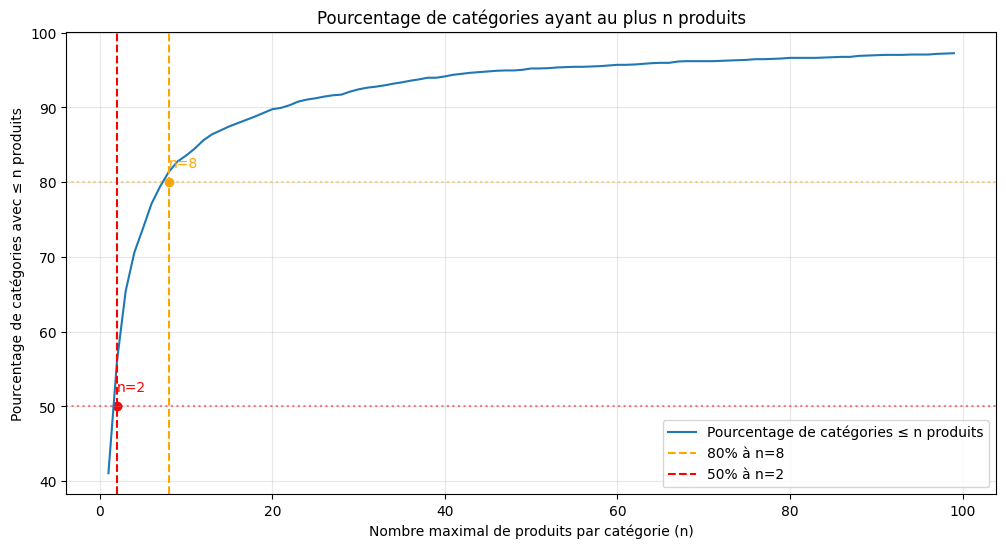

In [ ]:
# Courbe du pourcentage de catégories qui ont au plus n produits
leaf_counts = df["leaf"].value_counts()

n_range = range(1, 100)
pourcentage = [
    (leaf_counts <= n).sum() / len(leaf_counts) * 100
    for n in n_range
]

# Trouver les valeurs de n pour lesquelles le pourcentage dépasse 80% et 50%
n_80 = next((n for n, pct in zip(n_range, pourcentage) if pct >= 80), None)
n_50 = next((n for n, pct in zip(n_range, pourcentage) if pct >= 50), None)

plt.figure(figsize=(12, 6))
plt.plot(n_range, pourcentage, label="Pourcentage de catégories ≤ n produits")

# Afficher les marques 80% et 50%
if n_80 is not None:
    plt.axvline(n_80, color='orange', linestyle='--', label=f"80% à n={n_80}")
    plt.axhline(80, color='orange', linestyle=':', alpha=0.5)
    plt.scatter([n_80], [80], color='orange')
    plt.text(n_80, 80+2, f"n={n_80}", color='orange', ha='left')
if n_50 is not None:
    plt.axvline(n_50, color='red', linestyle='--', label=f"50% à n={n_50}")
    plt.axhline(50, color='red', linestyle=':', alpha=0.5)
    plt.scatter([n_50], [50], color='red')
    plt.text(n_50, 50+2, f"n={n_50}", color='red', ha='left')

plt.xlabel("Nombre maximal de produits par catégorie (n)")
plt.ylabel("Pourcentage de catégories avec ≤ n produits")
plt.title("Pourcentage de catégories ayant au plus n produits")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


/var/folders/8t/bvd7zkvd7h7gh40kggvw4r0w0000gn/T/ipykernel_60026/2110204410.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_leaves.index, rotation=90)


Text(0.5, 1.0, 'Répartition Top/Autres (≥8 produits)')

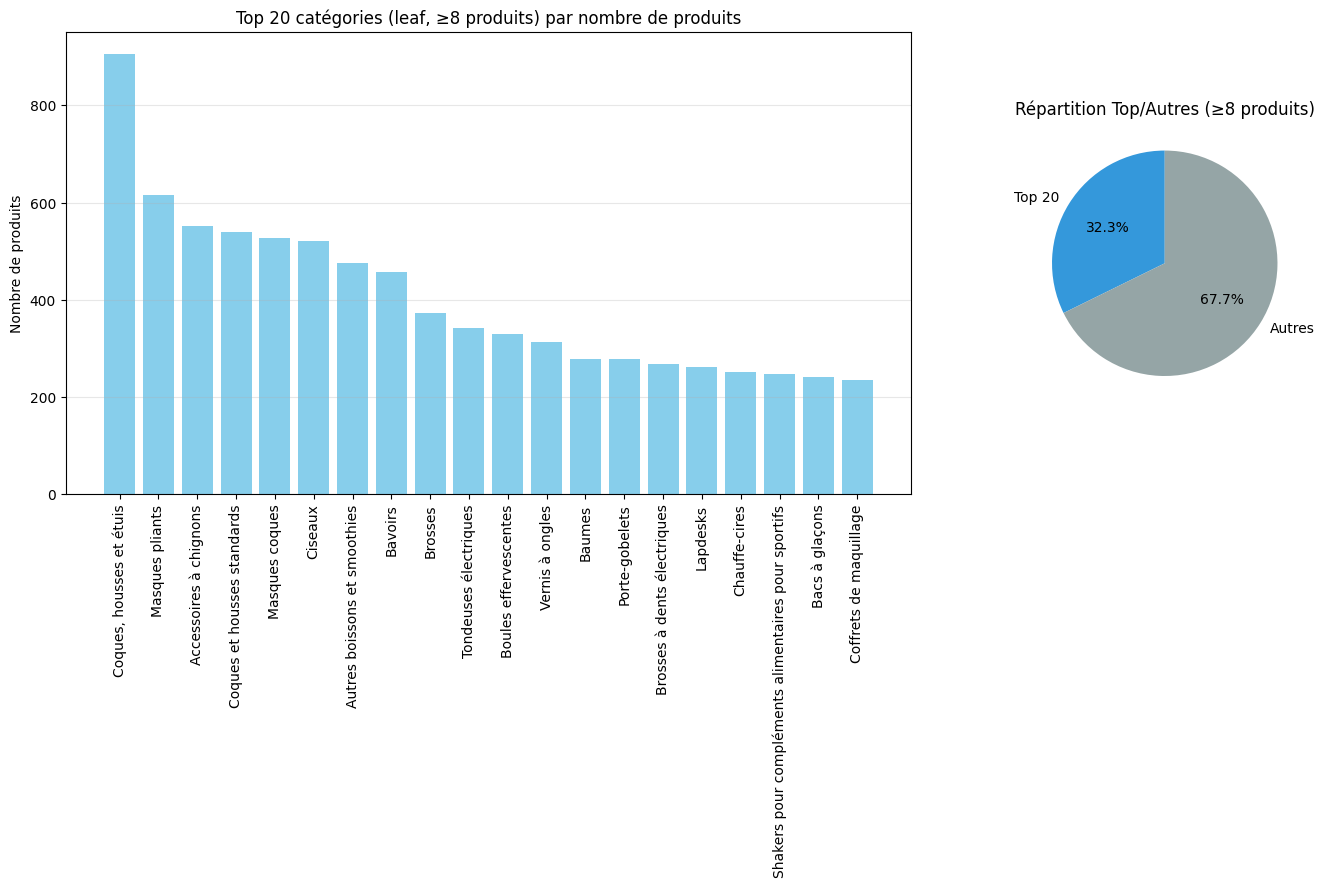

In [27]:
# Filtrer les catégories ayant au moins 8 produits
leaf_counts = df["leaf"].value_counts()
valid_leaves = leaf_counts[leaf_counts >= 8].index
filtered_df = df[df["leaf"].isin(valid_leaves)]

# Montrer un bar-chart des 20 catégories principales et un camembert pour "autres"
top_n = 20
filtered_leaf_counts = filtered_df["leaf"].value_counts()
top_leaves = filtered_leaf_counts.head(top_n)
other_count = filtered_leaf_counts.iloc[top_n:].sum()

fig, (ax, pie_ax) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

# Bar chart pour les 20 principales
bars = ax.bar(top_leaves.index, top_leaves.values, color='skyblue')
ax.set_xticklabels(top_leaves.index, rotation=90)
ax.set_ylabel("Nombre de produits")
ax.set_title(f"Top {top_n} catégories (leaf, ≥8 produits) par nombre de produits")
ax.grid(axis='y', alpha=0.3)

# Pie chart pour "autres"
pie_sizes = [top_leaves.sum(), other_count]
pie_labels = [f"Top {top_n}", "Autres"]

pie_ax.pie(
    pie_sizes, 
    labels=pie_labels, 
    colors=pie_colors, 
    autopct='%1.1f%%', 
    startangle=90, 
    textprops={'fontsize': 10}
)
pie_ax.set_title("Répartition Top/Autres (≥8 produits)", fontsize=12)

/var/folders/8t/bvd7zkvd7h7gh40kggvw4r0w0000gn/T/ipykernel_60026/3654883977.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(top_leaves.index, rotation=90)


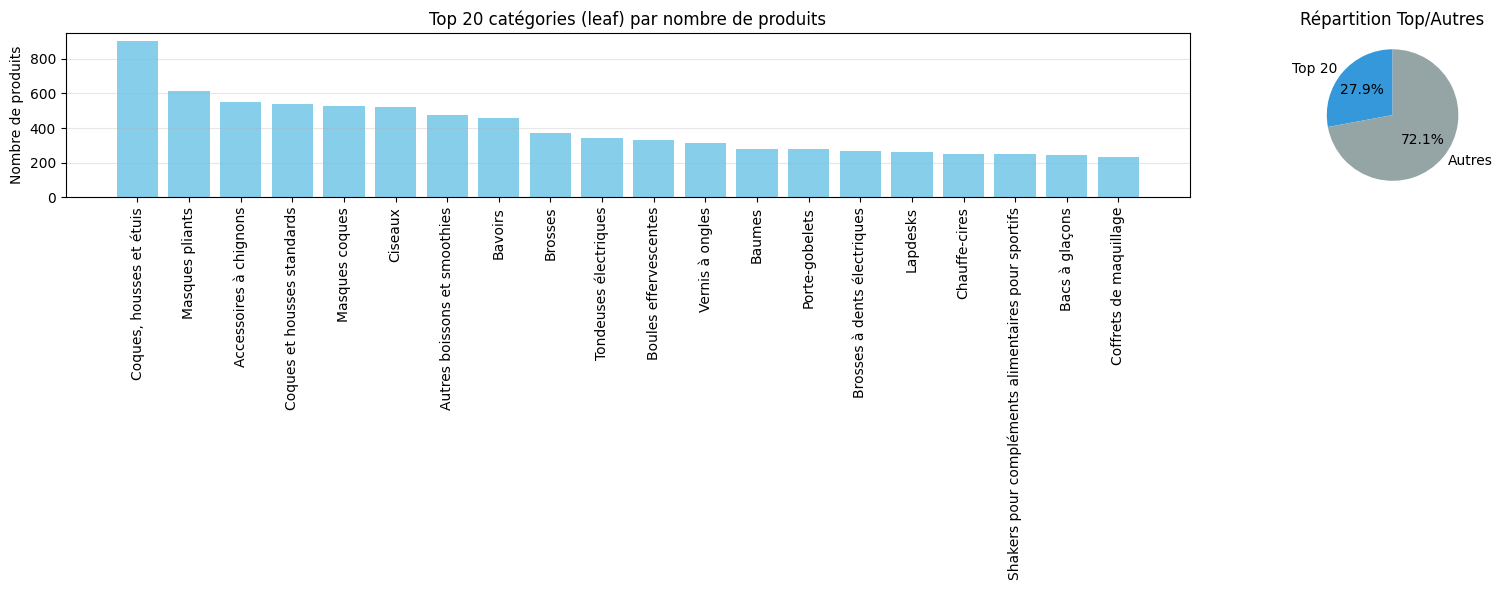

In [10]:
# Show a bar-chart of top-20 categories and a separate pie of “other” (no overlap)

top_n = 20
leaf_counts = df["leaf"].value_counts()
top_leaves = leaf_counts.head(top_n)
other_count = leaf_counts.iloc[top_n:].sum()

fig, (ax, pie_ax) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

# Bar chart for top 20
bars = ax.bar(top_leaves.index, top_leaves.values, color='skyblue')
ax.set_xticklabels(top_leaves.index, rotation=90)
ax.set_ylabel("Nombre de produits")
ax.set_title(f"Top {top_n} catégories (leaf) par nombre de produits")
ax.grid(axis='y', alpha=0.3)

# Pie chart for "other" (in separate axis)
pie_sizes = [top_leaves.sum(), other_count]
pie_labels = [f"Top {top_n}", "Autres"]
pie_colors = ['#3498db', '#95a5a6']

pie_ax.pie(
    pie_sizes, 
    labels=pie_labels, 
    colors=pie_colors, 
    autopct='%1.1f%%', 
    startangle=90, 
    textprops={'fontsize': 10}
)
pie_ax.set_title("Répartition Top/Autres", fontsize=12)

plt.tight_layout()
plt.show()


In [22]:
# Calculer le nombre total de produits si on ne garde que ceux dans des catégories ayant au moins 5 produits

leaf_counts = df["Product Category"].value_counts()
valid_leaves = leaf_counts[leaf_counts >= 5].index
filtered_df = df[df["Product Category"].isin(valid_leaves)]
total_filtered_products = len(filtered_df)

print(f"Nombre total de produits si on ne garde que ceux dans des catégories avec au moins 5 produits : {total_filtered_products}")

Nombre total de produits si on ne garde que ceux dans des catégories avec au moins 5 produits : 25578


In [21]:
# On veut compter le nombre de catégories "feuilles" (aucune autre catégorie ne commence par leur chemin suivi de " > ...")
# On suppose que les chemins sont dans une colonne, ou on peut charger le mapping id2path

import json

# Charger le mapping id2path
with open("../data_processed/mappings/id2path.json", "r") as f:
    id2path = json.load(f)

all_paths = list(id2path.values())

# Pour chaque chemin, vérifier si c'est un préfixe strict d'un autre chemin
leaf_paths = []
for path in all_paths:
    is_prefix = False
    for other in all_paths:
        if other != path and other.startswith(path + " >"):
            is_prefix = True
            break
    if not is_prefix:
        leaf_paths.append(path)

print(f"Nombre de catégories restantes (feuilles): {len(leaf_paths)}")

# Calculer combien de produits sont dans les catégories feuilles
# On suppose que la colonne "leaf" de df contient le chemin complet de la catégorie

# On crée un set pour accélérer la recherche
leaf_paths_set = set(leaf_paths)
# Filtrer les produits dont la catégorie (chemin) est une feuille
produits_feuilles = df[df["Product Category"].isin(leaf_paths_set)]
nb_produits_feuilles = len(produits_feuilles)

print(f"Nombre de produits dans les catégories feuilles : {nb_produits_feuilles}")


Nombre de catégories restantes (feuilles): 1618
Nombre de produits dans les catégories feuilles : 18074
